<div style="text-align: center"><font style="font-size:30px;align:center;text-align:center;color:gray">A <b><font style="color:green">cool</font></b> introduction to the capability of Jupyter Notebooks</font></div>

<div style="width: 500px; position: relative; left: 20%">  
    
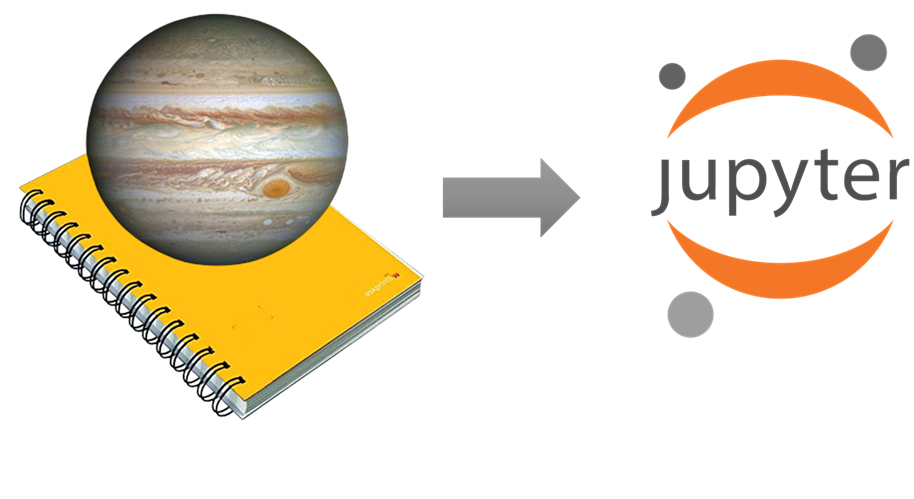
    
</div>

 <b>Recommendations</b>

 - Don't try to take notes, just let this wash over you (You will get the notebook)
 - Not knowing what's possible is a cognitive blindspot.
 - Take time to learn your tools -- the investment will pay dividends.

# Introduction

## How cool is Markdown?

### Assortment of functionalities it has to offer

When you wish to **highlight** something, or *subtly emphasize*, or `quote` something (maybe incorrectly)
> *To be or not to be, that is the question*  
<div style="text-align: right">- Mahatma Gandhi</div>

You ~cannot~ can use Markdown for this!

**Lists**
- Point A
    - Point A.1
    - Point A.2
        - Point A.2.1
- Point B

**Line Spacings**:  

Normal:  

---  

Show-off:
<hr style="border: 5px solid green;border-radius: 5px;">

**Checkboxes**:


- [x] Write the press release  
- [ ] Update the website  
- [ ] Contact the media

**Tables**:  

| Column 1 | Column 2 | Column 3 |
| -------- | -------- | -------- |
| 1        | A        | 8.36%    |
| 2        | B        | 2.32%    |
| 3        | C        | 1.92%    |
| 4        | D        | 84.60%   |

**Mix and match lots of text formatting**  

> Something intelligible
>> There's **gonna come** a point where you'll you will want to go 1 level deeper
>>> *But seriously*
>>>> It ~won't~ **_Will_** get ridiculous beyond a certain point
>>>>> These keep nesting at 20 levels. Markdown rocks

![image.png](https://cdn0.iconfinder.com/data/icons/octicons/1024/markdown-512.png)

**I can have codes written in multiple languages and included as reference texts as well**

Python:
```python
def example_function():
    """Docstring for example function"""
    
    print(textwrap.dedent("""
    This is a multi-lined string
    that I want to write inside of a function.
    Notice what happens when I print this.
        And when something is indented more."""))
```

SQL:
```sql
SELECT column1
       ,column2
FROM table1
WHERE column3 IN
(
    SELECT TOP(1) column4
    FROM table2
    INNER JOIN table3
    ON table2.column1 = table3.column1
)
```

Here's an easy way to link to a different section: [LaTeX](#division_ID)

### LaTeX 

<a id="division_ID"></a>

$$ 
H_0: Null\ Hypothesis\\
H_1: Alternate\ Hypothesis
$$

With text and $\LaTeX$ support.

$$\begin{align}
        B'&=-\nabla \times E,\\
        E'&=\nabla \times B - 4\pi j
\end{align}$$

#### Go Crazy!

**Decision Variable:**  
$x[d][i][j]$ : A binary variable representing whether a salesman goes from store i to store j on day d
- Value 0 for i,j represents the depot (starting point of any beat)
- d ranges from 0 to $4*7$, with weeks starting from Monday (d=0,d=7,d=14 represent mondays)

**Objective:** Minimize travel time (i.e. Maximize RFT)
$$MIN(\sum_{d=0}^{27}    \sum_{i=0}^{N}    \sum_{j=0}^{N}     x[i][j]*c[i][j])   $$

**Constants:**
- $MIN\_STORES\_PER\_DAY$, $MAX\_STORES\_PER\_DAY$: Min & Maximum number of stores that can be visited in a day
- $N$: Number of stores
- $V$: List of stores to be visited by a salesman, including depot (Length = N+1)
- $4$: Number of weeks for which the plan needs to be made (Each week has 6 days)
- $MAX\_HOURS\_WEEKDAY$, $MAX\_HOURS\_WEEKEND$: Maximum working hours during a weekday & weekend
- $HOLIDAYS$: List of days where the salesman is on a holiday (Eg: Sundays). Note: $HOLIDAYS \subset [0,4*7)$
- $TYPE[i] \; \forall\; i \subseteq V\; $: Store type for a particular store
- $MIN\_RFT[T]$: Minimum number of RFT (in minutes) that must be spent during each visit to a store of a certain type
- $c[i][j]\; \forall\; i,j \subseteq V$: Cost to travel from store i to store j (Time to travel)
- $FREQ[i] \; \forall\; i \subseteq V\;$: Planned frequency of visits for each store


**Constraints:**  



- All routes must start and end at the depot
$$\sum_{j=1}^{N}x[d][0][j]=1 \; \forall \; d \subseteq \; [0,4*7)$$
$$\sum_{i=1}^{N}x[d][i][0]=1 \; \forall \; d \subseteq \; [0,4*7)$$
- 2 constraints clubbed together:
    - A salesman can be engaged for a certain number of maximum hours per day  
    - A salesman must meet the min RFTs at each store (pre-determined for each store-type)  
    During Weekdays (when $d\%7 \not\subseteq [5,6]$)
        $$\sum_{i=0}^{N}\sum_{j=0, j \ne i}^{N} x[d][i][j]*(c[i][j] + MIN\_RFT[TYPE[j]]) \; \le \; MAX\_HOURS\_WEEKDAY * 60  \; \forall \; d \subseteq \; [0,4*7)$$
    During Weekends (when $d\%7 \subseteq [5,6]$)
        $$\sum_{i=0}^{N}\sum_{j=0, j \ne i}^{N} x[d][i][j]*(c[i][j] + MIN\_RFT[TYPE[j]]) \; \le \; MAX\_HOURS\_WEEKEND * 60  \; \forall \; d \subseteq \; [0,4*7)$$
    - *Interpretation: Total travel time + total RFT <= max working hours on all days*
- Holidays
    $$\sum_{i=0}^{N}\sum_{j=0, j \ne i}^{N} x[d][i][j] = 0 \; \forall \; d \subseteq \; HOLIDAYS$$
- Each store can be visited at most once per day  
$$\sum_{i=0, i \ne j}^{N}x[d][i][j] = 1 \; \forall j \subseteq V-\{0\},   \; d \subseteq \; [0,4*7)$$
- A salesman must visit a MIN_STORES_PER_DAY stores per day
$$\sum_{i=0}^{N}\sum_{j=1, j \ne i}^{N} x[d][i][j] \ge MIN\_STORES\_PER\_DAY   \; \forall \; d \subseteq \; [0,4*7)$$
- A salesman can have at most MAX_STORES_PER_DAY number of visits per day
$$\sum_{i=0}^{N}\sum_{j=1, j \ne i}^{N} x[d][i][j] \le MAX\_STORES\_PER\_DAY   \; \forall \; d \subseteq \; [0,4*7)$$

- Each store must be visited as per the planned frequency
$$\sum_{d=0}^{27}\sum_{i=0, i \ne j}^{N} x[d][i][j] = FREQ[j]  \; \forall j \subseteq V$$

- If a store has a frequency of 2 or 4, the visits must all be on the same day of the week
    - For a store j, if frequency = 2, 
        - First visit must be in the first 2 weeks, and only once
            $$\sum_{d=0}^{13}\sum_{i=0, i \ne j}^{N}x[d][i][j] = 1$$
        - Second visit be 14 days away
            $$\sum_{i=0, i \ne j}^{N}x[d][i][j] - x[(d+14)][i][j] = 0 \; \forall d \subseteq [0,13]$$
    - For a store j, if frequency = 4,
        - First visit must be in the first week, and only once
            $$\sum_{d=0}^{6}\sum_{i=0, i \ne j}^{N}x[d][i][j] = 1$$
        - Second, third and fourth visits must be 7 days apart
            $$\sum_{i=0, i \ne j}^{N}x[d][i][j] - x[(d+7)][i][j] = 0 \; \forall d \subseteq [0,6]$$
            $$\sum_{i=0, i \ne j}^{N}x[d][i][j] - x[(d+14)][i][j] = 0 \; \forall d \subseteq [0,6]$$
            $$\sum_{i=0, i \ne j}^{N}x[d][i][j] - x[(d+21)][i][j] = 0 \; \forall d \subseteq [0,6]$$
            
**Notes:** 
- All equality constraints will be replaced with inequality constraints (and a small slack variable of 1e-4) to allow for LP relaxation (Makes them easier to solve)     
- There are 2 Constraints which are already taken care of during clustering (pre-requisite to the optimization). These are:
    - Salesman of a following type must be mapped to the corresponding store
    - A store must be visited by the same salesman at any point of time (Cannot be visited by another salesman)

## Learn your shortcuts

Press `H` for HELP!

## Get efficient & lazy (with tab & shift-tab)

In [3]:
x="Hello World"

Press tab to autofill!

In [ ]:
x.

Quickly understand what each function does  
shift-tab  
shift-tab-tab  
shift-tab-tab-tab

In [135]:
import pandas as pd

In [ ]:
pd.read_csv()ashdsahdksahczv

## Multi-line edits!

Sample excel dump:  

one                       1  
two                       2  
three                     3  
four                      4  
five                      5

In [136]:
#Replace all numeric words till five  with their equivalent numbers
string = """
one, two, buckle my shoe
three, four, shut the door
five, six, pick up sticks
seven, eight, lay them straight
nine, ten, begin again"
"""


replacement_dict = {
"one" : 1  ,
"two" : 2  ,
"three" : 3  ,
"four" : 4  ,
"five" : 5,
}
for text,num in replacement_dict.items():
    string=string.replace(text,str(num))

In [137]:
print(f'New string: \n\n"{string}"')

New string: 

"
1, 2, buckle my shoe
3, 4, shut the door
5, six, pick up sticks
seven, eight, lay them straight
nine, ten, begin again"
"


## Execute different languages!

In [138]:
#Example of command prompt script being executed

!dir

20210201\ -\ Journey\ -\ Base\ Beat\ Plan\ Creation.html
Pandas-Profielr\ -\ Titanic\ Dataset.html
Pandas-Profiler\ -\ Census\ Dataset.html
Power\ of\ Jupyter.ipynb
Python-Some\ Powerful\ tips.ipynb
Reference
pivottable-js.gif
scatter.plotly
scatter_updated.plotly
titanic.csv


~~Real pros who use linux can try running this (*at their own risk*)~~  
~~`!sudo rm -rf /`~~

# NBExtensions

Make Jupyter notebooks operate on **Steroids** by installing [jupyter-nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/)

## Table of contents!

To make your life easier when navigating a long document, can be added to the sidebar, and also as a header!

## Text Beautify

**Raw JSON Text**  
{
  "python": {
    "library": "import json\ndef black_reformat(cell_text):\n    import black\n    import re\n    cell_text = re.sub('^%', '#%#', cell_text, flags=re.M)\n    try:\n        reformated_text = black.format_str(cell_text, 88)\n    except TypeError:\n        reformated_text = black.format_str(cell_text, mode=black.FileMode(line_length=88))\n    return re.sub('^#%#', '%', reformated_text, flags=re.M)",
    "prefix": "print(json.dumps(black_reformat(u",
    "postfix": ")))"
  },
  "r": {
    "library": "library(formatR)\nlibrary(jsonlite)",
    "prefix": "cat(toJSON(paste(tidy_source(text=",
    "postfix": ", output=FALSE)[['text.tidy']], collapse='\n')))"
  },
  "javascript": {
    "library": "jsbeautify = require('js-beautify')",
    "prefix": "console.log(JSON.stringify(jsbeautify.js_beautify(",
    "postfix": ")));"
  }
}

---  
Paste the text here, and press `ctrl`+`L`, or click on the hammer icon

In [ ]:
{
    "python": {
        "library":
        "import json\ndef black_reformat(cell_text):\n import black\n import re\n cell_text = re.sub('^%', '#%#', cell_text, flags=re.M)\n try:\n reformated_text = black.format_str(cell_text, 88)\n except TypeError:\n reformated_text = black.format_str(cell_text, mode=black.FileMode(line_length=88))\n return re.sub('^#%#', '%', reformated_text, flags=re.M)",
        "prefix": "print(json.dumps(black_reformat(u",
        "postfix": ")))"
    },
    "r": {
        "library": "library(formatR)\nlibrary(jsonlite)",
        "prefix": "cat(toJSON(paste(tidy_source(text=",
        "postfix": ", output=FALSE)[['text.tidy']], collapse='\n')))"
    },
    "javascript": {
        "library": "jsbeautify = require('js-beautify')",
        "prefix": "console.log(JSON.stringify(jsbeautify.js_beautify(",
        "postfix": ")));"
    }
}

## Scratchpad

In [ ]:
ctrl+b

## Notify

Perfect - for those long running tasks

## Collapsible headings


*poof*

# Jupyter Widgets!

## Basic sine-wave

In [16]:
import pandas as pd
import plotly.tools as tls
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
# Plotly for prettier plots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
plot.rcParams["figure.figsize"] = (12,5)

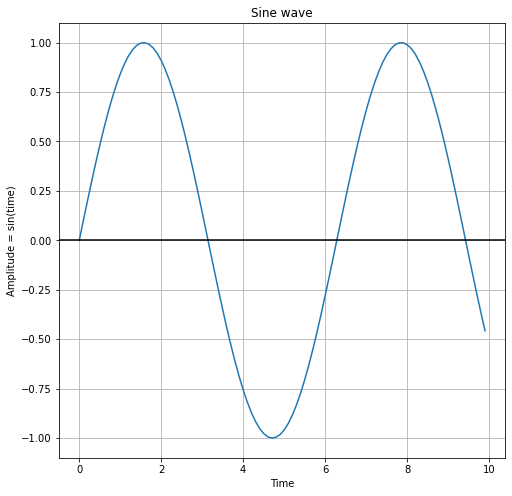

In [133]:
# Get x values of the sine wave
time = np.arange(0, 10, 0.1)

# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)

# Give a title for the sine wave plot
plot.title('Sine wave')

# Give x axis label for the sine wave plot
plot.xlabel('Time')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

# Display the sine wave
plot.show()

## Make it interactive!

In [24]:
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from numpy.random import rand

from ipywidgets import FloatSlider, interactive, IntSlider, FloatRangeSlider

In [41]:
def simple_example(amplitude=2.0, phase=0.0):
    plt.rcParams['figure.figsize'] = 8,6
    plt.figure()
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y = amplitude * np.sin(x + phase)
    plt.plot(x, y)
    plt.xlim(-5, 5)
    plt.ylim(-2*np.pi, 2*np.pi)
    plt.show()
    return

In [134]:
amplitude_slider = FloatSlider(value=2.0, min=0, max=6.0, step=.1)
phase_slider = FloatSlider(value=0.0, min=-np.pi, max=np.pi, step=.10)

interactive(simple_example,
            amplitude=amplitude_slider,
            phase=phase_slider
           )

interactive(children=(FloatSlider(value=2.0, description='amplitude', max=6.0), FloatSlider(value=0.0, descrip…

## Slightly more useful example (but relevant to me)

In [139]:
import plotly.express as px
df = px.data.iris()


def update_iris_chart(slider_range):
    low, high = slider_range
    mask = (df.petal_width > low) & (df.petal_width < high)

    fig = px.scatter_3d(df[mask],
                        x='sepal_length',
                        y='sepal_width',
                        z='petal_width',
                        title="Iris dataset - visualized in 3D",
                        template="plotly_white",
                        color="species",
                        hover_data=['petal_width'])

    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()


width_range_slider = FloatRangeSlider(value=(0., 2.5),
                                      min=0,
                                      max=2.5,
                                      step=0.1,
                                      description="Petal Width",
                                      orientation="vertical",
                                      readout_format=".1f")

interactive(update_bar_chart, slider_range=width_range_slider)

interactive(children=(FloatRangeSlider(value=(0.0, 2.5), description='Petal Width', max=2.5, orientation='vert…

# Magic functions

## Timeit
And writing performant codes - understand how long it takes to execute a code, and find ways to improve it

<font color="Blue">Our task:</font> Create a column that is equal to $(a+b)^2$

In [50]:
#Build the data - create a table of 100,000 rows and 2 columns filled with random numbers from 0 to 100

import pandas as pd
import numpy as np
import numba


df = pd.DataFrame(np.random.randint(0,100,size=(100000, 2)),columns=['a','b'])

print(f"The dataframe has {df.shape[0]:,} rows and {df.shape[1]} columns")
df.head()

The dataframe has 100,000 rows and 2 columns


,a,b
0,24,64
1,39,58
2,23,87
3,42,20
4,16,72


Note:  
$millisecond(ms) = \frac{1}{1,000}second$  
$microsecond(\mu s) = \frac{1}{1,000}microsecond$

In [51]:
# function for creating new col
def do_operation_simple_way(a,b):
    return (a+b)**2


**Approach 1** - `For loops`

In [65]:
%%timeit -n1 -r1

list_result=[]
for _,row in df.iterrows():
    list_result.append(do_operation_simple_way(row[0],row[1]))
df['op_res'] = list_result

4.35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Approach 2** - `pd.apply`

In [64]:
%%timeit -n50 -r1

df['op_res'] = df.apply(lambda row:do_operation_simple_way(row['a'],row['b']),axis=1)

895 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 50 loops each)


**Approach 3** - `Vectorize`

In [84]:
%%timeit -n500 -r1
df['op_res'] = np.vectorize(do_operation_simple_way)(df['a'],df['b'])

27.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 500 loops each)


**Approach 4** - `Numba`  
For more info - [Link](https://alievmagomed.com/6-ways-to-significantly-speed-up-pandas-with-a-couple-lines-of-code/)

In [78]:
import numba
do_operation_numba_way = numba.jit(do_operation_simple_way, cache=False) #Remove cache to ensure results are calculated always

In [83]:
%%timeit -n500 -r1
df['op_res'] = do_operation_numba_way(df['a'].to_numpy(),df['b'].to_numpy())

276 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 500 loops each)


<font color="red">In this case, numba is almost <b>3,200x</b> faster than pandas apply!! (and <b>1,000</b> times faster than the fastest vectorized operation!) </font>

## Profilers to inspect efficiency - speed and memory

There are several profilers provided as magic functions (prun, lprun, memit, mprun etc.). We will work with a simple line profiler (lprun) for now

In [108]:
%load_ext line_profiler
%load_ext memory_profiler

In [101]:
def run_all_above_methods_step_by_step():
    df['op_res'] = df.apply(lambda row:do_operation_simple_way(row['a'],row['b']),axis=1)
    df['op_res'] = np.vectorize(do_operation_simple_way)(df['a'],df['b'])
    df['op_res'] = do_operation_numba_way(df['a'].to_numpy(),df['b'].to_numpy())
    return True
    

In [112]:
#Understand line by line performance of function
%lprun -f run_all_above_methods_step_by_step run_all_above_methods_step_by_step()

In [111]:
#Understand memory usage of function
%memit run_all_above_methods_step_by_step()

peak memory: 279.80 MiB, increment: 2.52 MiB


# EDAs made easy!

## Pandas-Profiler

Example html files:  
[Titanic](https://pandas-profiling.github.io/pandas-profiling/examples/master/titanic/titanic_report.html)  
[Census Income (US Adult Census data relating income)](https://pandas-profiling.github.io/pandas-profiling/examples/master/census/census_report.html)

Source - [Link](https://github.com/pandas-profiling/pandas-profiling)

---
How easy is it to generate it?

In [121]:
from pandas_profiling import ProfileReport
df = pd.read_csv("Titanic.csv")
ProfileReport(df) #Show the embedded report. To save as html-> profile.to_file("your_report.html")

## Edit plotly through a GUI??

Reference - [Link](https://github.com/plotly/jupyterlab-chart-editor)

Step 1: Create your basic viz

In [123]:
import plotly.graph_objs as go
import plotly.io as pio

fig = go.Figure()
fig.add_scatter(y=[2, 4, 3, 2.5])
fig.show()

Step 2 - Write to JSON

In [125]:
pio.write_json(fig, 'scatter.plotly')

Step 3: Use Jupyterlab's plotly editor to work on the chart, and save it as a plotly object again (**Demo time**)

Step 4 (Optional): Read it back as a plotly object

In [128]:
fig_styled = pio.read_json('scatter_updated.plotly')
fig_styled

#And do whatever you need to! (Added bonus - It is a json - you can see exactly how the chart was created!)

# Some other cool things:

## Add Data Validations quickly!

And these work as good as unit tests!

https://greatexpectations.io/ (Pip install great_expectations)

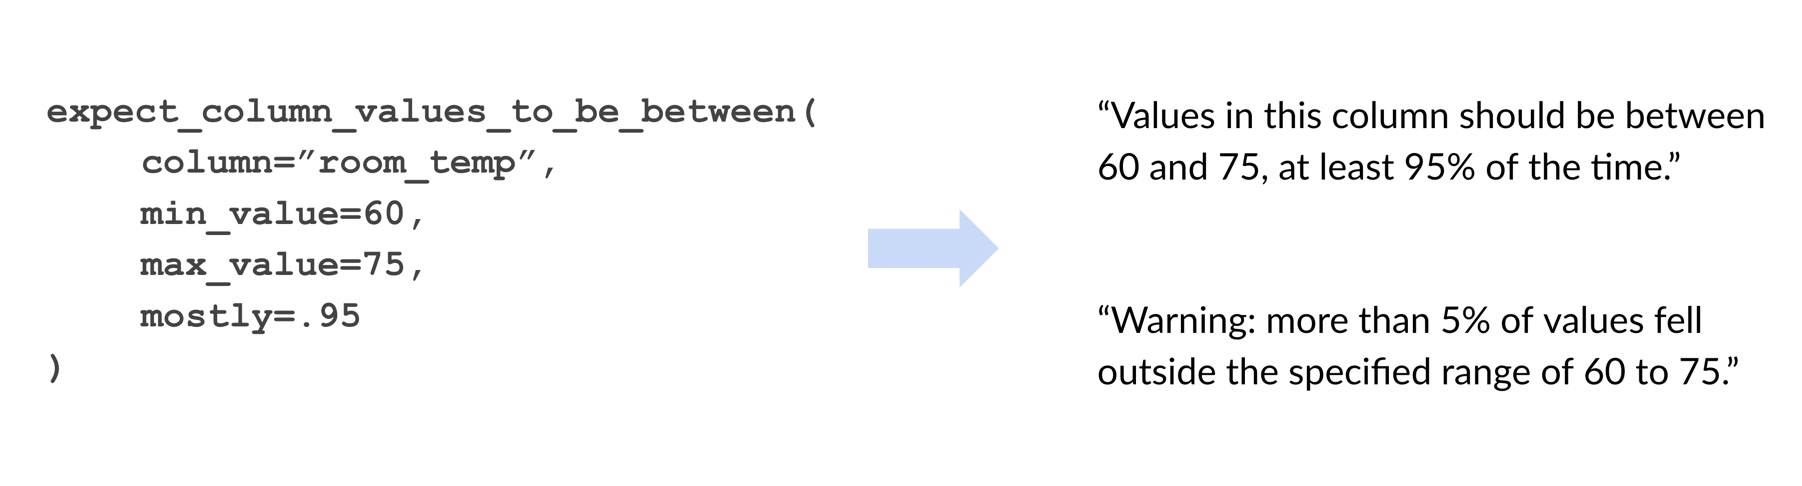

- expect_column_values_to_not_be_null
- expect_column_values_to_match_regex
- expect_column_values_to_be_unique
- expect_column_values_to_match_strftime_format
- expect_table_row_count_to_be_between
- expect_column_median_to_be_between

## Pivot dataframes, quickly visualize data through a GUI on Jupyter

pivottable.js package

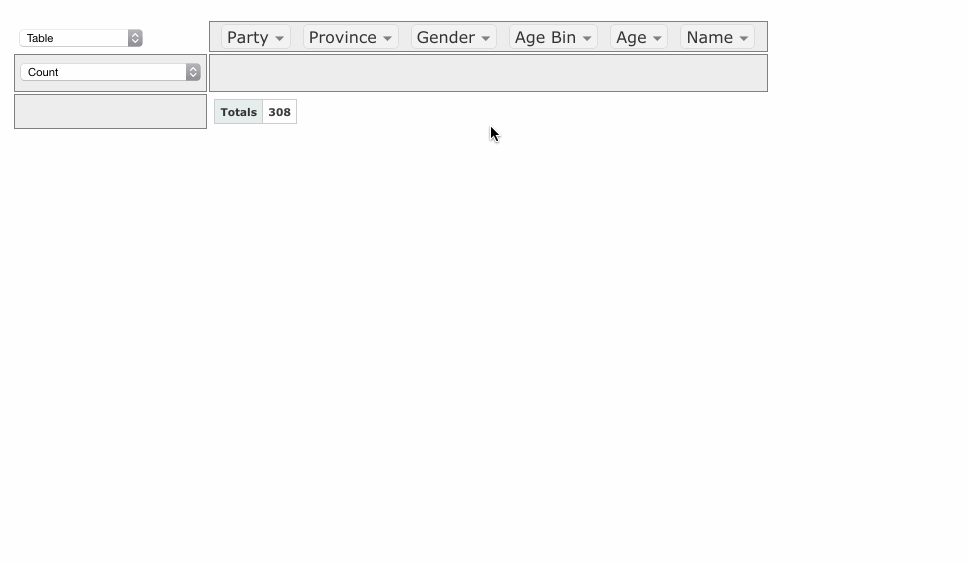

Also checkout QGrid

# Conclusion

Python has ~ 315,000 packages (served through PyPi - the service behind "pip install xyz")

R has ~ 10,000 packages (served through CRAN)

Each of these packages are designed to address a specific problem

<u>All these packages are your tools - chances are, you can easily find a tool or technique to help quickly and effectively solve your problem</u>

---

**What next?**  

Become aware of what's possible in your field of interest  
Next - Understand your tools, pick a good set of tools to start with, and make them your own

**Footnote**:

Many Jupyter Examples collected from : [Jupyter Notebook Tips and Tricks](https://github.com/jbwhit/jupyter-tips-and-tricks)